In [ ]:
#mengambil dataset dengan wget
!wget --no-check-certificate\
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-05 11:18:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  4.46MB/s    in 62s     

2021-07-05 11:19:15 (4.94 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [ ]:
pip install split_folders

In [ ]:
import tensorflow as tf
import zipfile, os

#melakukan extract pada zip file
local_zip      = 'rockpaperscissors.zip'
zip_ref        = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 4,
    shuffle = True,
    subset = 'training',
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 4,
    shuffle = True,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#pembuatan model
model.compile(optimizer = tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#pelatihan model
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    )

Epoch 1/20
25/25 [==============================] - 9s 335ms/step - loss: 1.0491 - accuracy: 0.3900 - val_loss: 1.0990 - val_accuracy: 0.3500
Epoch 2/20
25/25 [==============================] - 8s 328ms/step - loss: 1.0773 - accuracy: 0.5100 - val_loss: 0.9645 - val_accuracy: 0.6500
Epoch 3/20
25/25 [==============================] - 8s 322ms/step - loss: 1.0813 - accuracy: 0.4400 - val_loss: 0.9805 - val_accuracy: 0.4500
Epoch 4/20
25/25 [==============================] - 8s 319ms/step - loss: 0.9219 - accuracy: 0.5500 - val_loss: 0.8553 - val_accuracy: 0.5500
Epoch 5/20
25/25 [==============================] - 8s 316ms/step - loss: 0.6651 - accuracy: 0.6939 - val_loss: 0.3687 - val_accuracy: 0.7500
Epoch 6/20
25/25 [==============================] - 8s 320ms/step - loss: 0.5169 - accuracy: 0.8000 - val_loss: 0.7189 - val_accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 8s 320ms/step - loss: 0.4874 - accuracy: 0.8500 - val_loss: 0.2273 - val_accuracy: 0.9500
Epoch 

Saving WhatsApp Image 2021-07-05 at 6.23.26 PM.jpeg to WhatsApp Image 2021-07-05 at 6.23.26 PM (6).jpeg
WhatsApp Image 2021-07-05 at 6.23.26 PM.jpeg
scissors


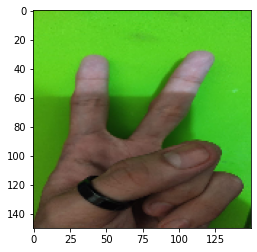

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
    pred_indices = train_generator.class_indices
     
    for fn in uploaded.keys():
     
      # proses prediksi
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      output_class = np.argmax(classes)
      print(fn)
      if output_class==0:
          print('paper')
      elif output_class==1:
          print('rock')
      else:
          print('scissors')